# ラプラス正則化最小二乗分類
データのうちラベル付けされたものが半教師付き学習の設定．  
データ空間で近傍にある点同士の出力が滑らかになるような制約式を加えることで，ラベルなしデータを活用する．  

### 宿題1 ガウスカーネルモデルに対してラプラス正則化最小二乗分類を実装せよ

In [1]:
import numpy as np
import matplotlib
from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# データ生成
def generate_data(n, random_state):
    np.random.seed(random_state)
    x = np.linspace(0, np.pi, n // 2)
    u = np.stack([np.cos(x) + .5, -np.sin(x)], axis=1) * 10.
    u += np.random.normal(size=u.shape)
    v = np.stack([np.cos(x) - .5, np.sin(x)], axis=1) * 10.
    v += np.random.normal(size=v.shape)
    x = np.concatenate([u, v], axis=0)
    y = np.zeros(n)
    y[0] = 1
    y[-1] = -1
    return x, y

In [3]:
# ラプラス正則化最小二乗分類
def lrls(x, y, h=1., l=1., nu=1.):
    """
    :param x: data points
    :param y: labels of data points
    :param h: width parameter of the Gaussian kernel
    :param l: weight decay
    :param nu: Laplace regularization
    :return:
    """
    #labelがついているものを取り出す
    x_label = x[(y == 1) | (y == -1)]
    y_label = y[(y == 1) | (y == -1)]
    
    #Lを求める
    W = np.exp(-np.sum((x[:, None] - x[None]) ** 2, axis=2)/ (2 * h ** 2))
    _D = np.sum(W, axis=1)
    D = np.diag(_D)
    L = D - W
    
    #カーネル行列を求める
    k = W
    k_label = np.exp(-np.sum((x_label[:, None] - x[None]) ** 2, axis=2)/ (2 * h ** 2))
    
    #thetaの計算
    theta = np.linalg.solve(k_label.T.dot(k_label) + l*np.identity(len(k))+2*nu*k.T.dot(L.dot(k)), k_label.T.dot(y_label[:, None]))

    return theta

In [4]:
# 可視化
def visualize(x, y, theta, h=1.):
    plt.clf()
    plt.figure(figsize=(6, 6))
    plt.xlim(-20., 20.)
    plt.ylim(-20., 20.)
    grid_size = 100
    grid = np.linspace(-20., 20., grid_size)
    X, Y = np.meshgrid(grid, grid)
    mesh_grid = np.stack([np.ravel(X), np.ravel(Y)], axis=1)
    k = np.exp(-np.sum((x.astype(np.float32)[:, None] - mesh_grid.astype(
        np.float32)[None]) ** 2, axis=2).astype(np.float64) / (2 * h ** 2))
    plt.contourf(X, Y, np.reshape(np.sign(k.T.dot(theta)),
                                  (grid_size, grid_size)),
                 alpha=.4, cmap=plt.cm.coolwarm)
    plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], marker='$.$', c='black')
    plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], marker='$X$', c='red')
    plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], marker='$O$', c='blue')
    plt.savefig('lecture9-h1.png')

<Figure size 432x288 with 0 Axes>

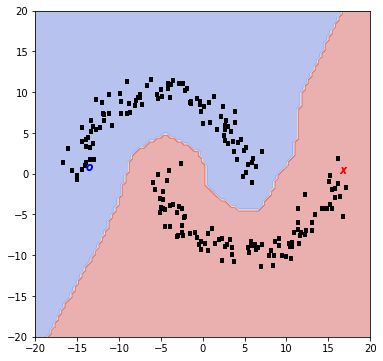

In [5]:
x, y = generate_data(n=200, random_state=0)
theta = lrls(x, y, h=1.)
visualize(x, y, theta)

ラベル付きデータは2つのカテゴリ中にそれぞれ1つずつしかない設定としているが，  
うまくクラスタを考慮してラベルのないデータに対しても正しく分類できている．  